<a href="https://colab.research.google.com/github/LanitaMG/py_Evaluacion/blob/main/NBA_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de librerías
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns


# Estadísticas NBA - Season 2021-2022

Datos
Fuente: https://www.basketball-reference.com

In [ ]:
#Creación del data frame a partir de un csv
nba_stats_original = pd.read_csv("https://raw.githubusercontent.com/LanitaMG/py_Evaluacion/main/NBA_2021-2022.csv", decimal=",")

In [ ]:
# Lista de columnas
nba_stats_original.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', '0-3f%', '3-10f%', '10-16f%',
       '16f-3P%', 'Dunks%', 'Dunks', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
# Tipo de datos
nba_stats_original.dtypes

Rk           int64
Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
0-3f%      float64
3-10f%     float64
10-16f%    float64
16f-3P%    float64
Dunks%     float64
Dunks        int64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
dtype: object

In [ ]:
#Descripción de los datos (1/2)
nba_stats_original.filter(['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%', '2P', '2PA', '2P%']).describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.705665,16.672414,18.264655,2.869828,6.386330,0.426235,0.871305,2.560591,0.276538,2.000000,3.828448,0.488091
std,172.637333,4.059640,25.898042,23.817195,9.649056,2.224084,4.651322,0.148525,0.841935,2.205642,0.157579,1.762565,3.192831,0.180538
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,0.224000,0.700000,1.400000,0.444000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,0.321500,1.500000,3.000000,0.512000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,0.370250,2.800000,5.100000,0.578000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,9.500000,18.300000,1.000000


In [ ]:
#Descripción de los datos (2/2)
nba_stats_original.filter(['0-3f%', '3-10f%', '10-16f%', '16f-3P%', 'Dunks%', 'Dunks', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']).describe()

,0-3f%,3-10f%,10-16f%,16f-3P%,Dunks%,Dunks,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.00000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,0.601470,0.352713,0.30261,0.275959,0.062149,15.179803,1.204310,1.575123,0.658267,0.812808,2.519704,3.331527,1.808251,0.582759,0.353448,0.978695,1.564532,7.812192
std,0.245394,0.214614,0.24137,0.260482,0.097887,27.960112,1.288034,1.585927,0.283491,0.744173,1.790751,2.352880,1.838080,0.425452,0.360744,0.817941,0.826830,6.138266
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.562750,0.250000,0.00000,0.000000,0.000000,0.000000,0.400000,0.500000,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,0.667000,0.399000,0.34200,0.302500,0.024500,4.000000,0.900000,1.200000,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,0.732250,0.483000,0.46550,0.429000,0.077000,17.000000,1.600000,2.000000,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,1.000000,1.000000,1.00000,1.000000,0.630000,233.000000,9.600000,11.800000,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


array(['TOR', 'MEM', 'MIA', 'BRK', 'UTA', 'TOT', 'NOP', 'MIL', 'CLE',
       'IND', 'LAL', 'ORL', 'NYK', 'HOU', 'WAS', 'PHO', 'SAC', 'DET',
       'CHO', 'CHI', 'ATL', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN',
       'DAL', 'GSW', 'POR', 'BOS'], dtype=object)

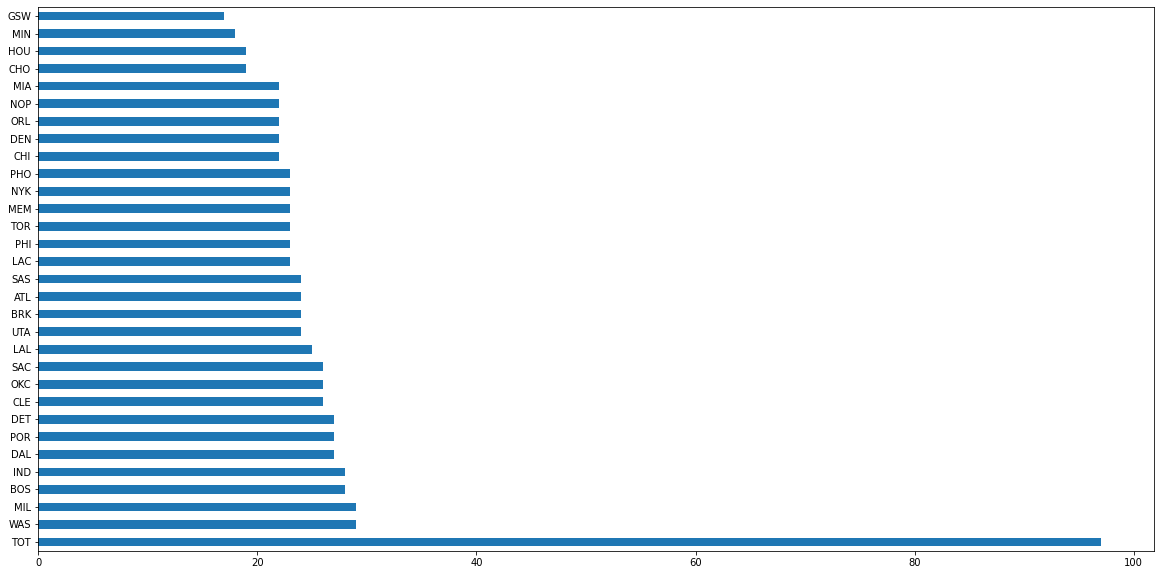

In [ ]:
#Verificación de los valores de la columna Tm (Team)
nba_stats_original['Tm'].value_counts().plot(kind='barh', figsize=(20,10))
nba_stats_original['Tm'].unique()

In [ ]:
# Eliminar equipo TOT (representa el total de la estadística de aquellos jugadores que pasaron por más de un equipo)
# Mantener solamente las columnas relevantes
nba_stats = nba_stats_original.loc[nba_stats_original["Tm"] != 'TOT'].filter(['Rk','Player', 'Pos', 'Tm', '3P', '3P%', '2P', '2P%', '0-3f%', '3-10f%', '10-16f%','16f-3P%', 'Dunks', 'FT', 'FT%', 'TRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'])


# Posiciones

##  ¿Cuáles son las posiciones de juego en el baloncesto?
PG	BASE (Point Guard, Playmaker)

SG	ESCOLTA (Alero Bajo, Shooting Guard)

SF	ALERO (Alero Alto, Small Forward)

PF	ALA-PIVOT (Power Forward)

C	PIVOT (Center)

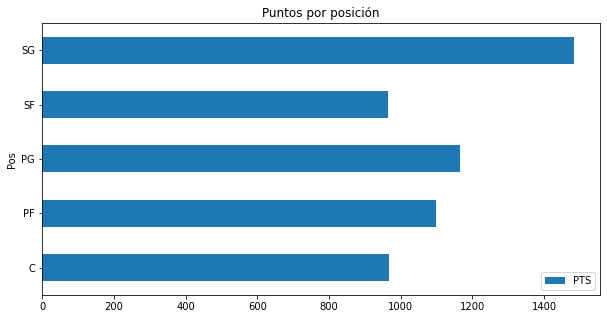

In [ ]:
# Total de puntos por posición (la tabla suministra el promedio de puntos por partido por jugador)
nba_stats.groupby('Pos')['PTS'].sum().plot(kind='barh', legend='Reverse', title='Puntos por posición', figsize=(10,5));



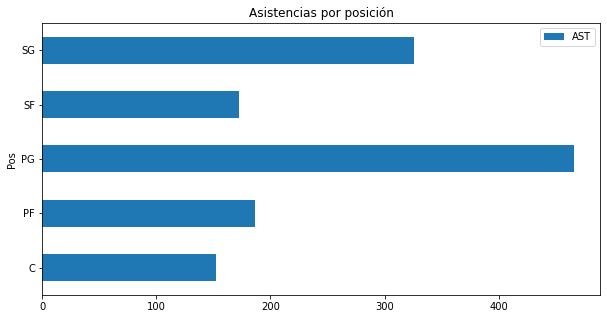

In [ ]:
# Total de asistencias por posición (la tabla suministra el promedio de asistencias por partido por jugador)
nba_stats.groupby('Pos')['AST'].sum().plot(kind='barh', legend='Reverse', title='Asistencias por posición', figsize=(10,5));


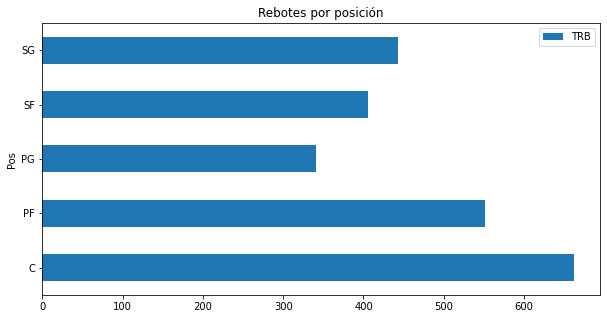

In [ ]:
# Total de rebotes por posición (la tabla suministra el promedio de rebotes por partido por jugador)
nba_stats.groupby('Pos')['TRB'].sum().plot(kind='barh', legend='Reverse', title='Rebotes por posición', figsize=(10,5));


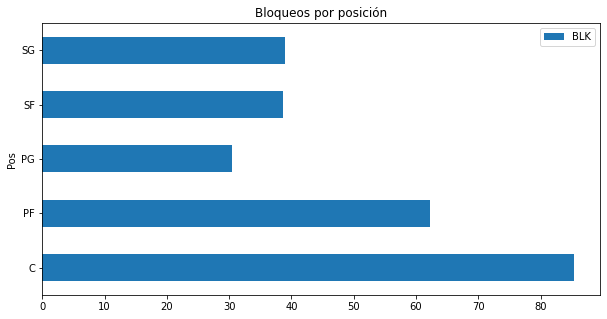

In [ ]:
# Total de bloqueos por posición (la tabla suministra el promedio de bloqueos por partido por jugador)
nba_stats.groupby('Pos')['BLK'].sum().plot(kind='barh', legend='Reverse', title='Bloqueos por posición', figsize=(10,5));


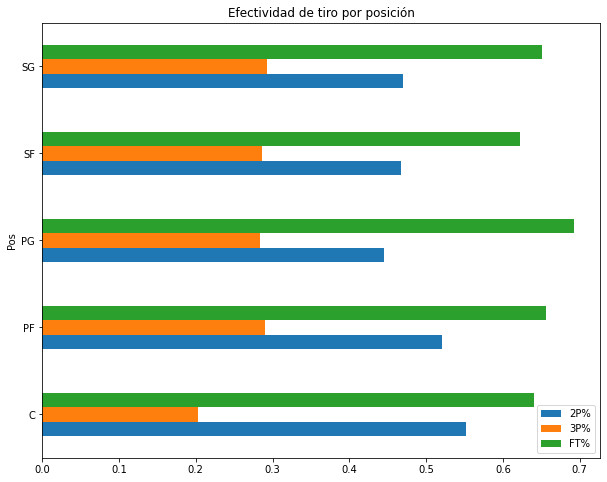

In [ ]:
# Efectividad de tipo por posición: tiros libres (FT), dobles (2P) y triples (3P)
nba_stats.groupby('Pos').mean().filter(['2P%','3P%', 'FT%']).plot(kind='barh', title='Efectividad de tiro por posición', figsize=(10,8));


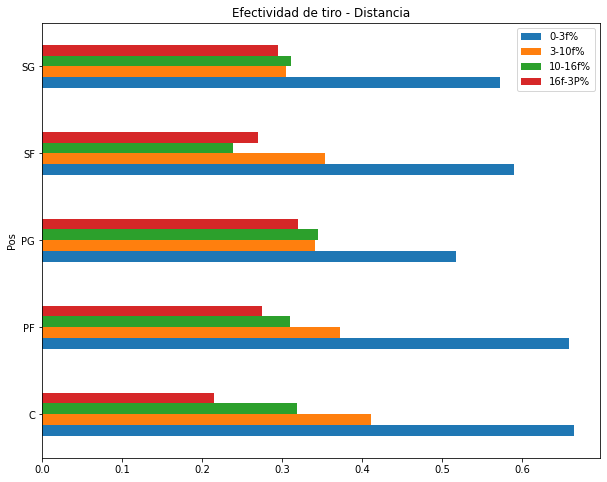

In [ ]:
# Efectividad de tipo por posición: distancia al aro 
nba_stats.groupby('Pos').mean().filter(['0-3f%', '3-10f%', '10-16f%','16f-3P%']).plot(kind='barh', title='Efectividad de tiro - Distancia', figsize=(10,8));


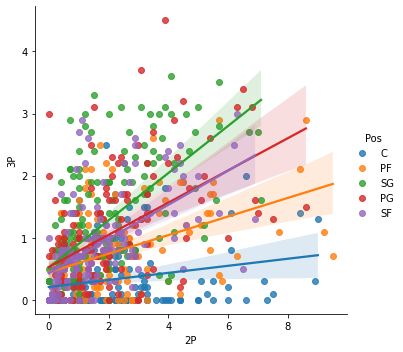

In [ ]:
# Cantidad de puntos dobles y triples anotados por posición
sns.lmplot(x='2P', y='3P', data=nba_stats, hue='Pos');


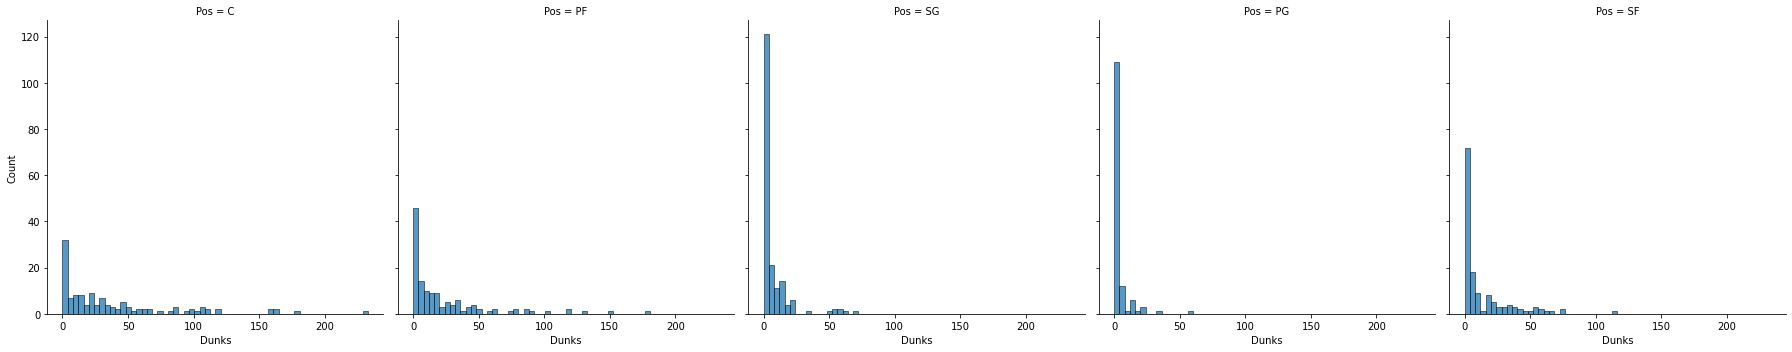

In [ ]:
# Cantidad de volcadas por posición
sns.displot(nba_stats, x='Dunks', col="Pos");


In [57]:
# Listado de los 15 jugadores con mayor cantidad de volcadas
nba_stats.nlargest(15, columns=['Dunks']).filter(['Player', 'Tm', 'Dunks'])

,Player,Tm,Dunks
257,Rudy Gobert,UTA,233
15,Giannis Antetokounmpo,MIL,179
635,Mitchell Robinson,NYK,178
9,Jarrett Allen,CLE,164
112,Clint Capela,ATL,164
241,Daniel Gafford,WAS,158
789,Robert Williams,BOS,157
516,Evan Mobley,CLE,151
260,Aaron Gordon,DEN,130
797,Christian Wood,HOU,120


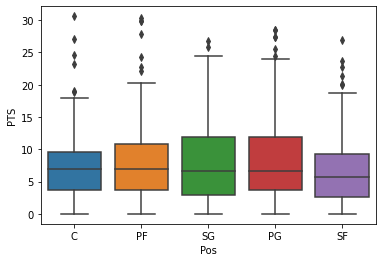

In [62]:
# Distribución de puntos por posición
sns.boxplot(x="Pos", y="PTS", data=nba_stats);


In [ ]:
# Determinar los jugadores que generan los valores atípicos

# Determinación del Q3, IQR y valor del bigote superior
Q3 = nba_stats['PTS'].quantile(0.75)
IQR = nba_stats['PTS'].quantile(0.75) - nba_stats['PTS'].quantile(0.25)
BS = (Q3 + 1.5 * IQR)

# Listado de jugadores con anotaciones con valores atípicos
Jugadores = nba_stats[nba_stats['PTS']> BS]
Jugadores.filter(['Player', 'Pos', 'PTS'])


,Player,Pos,PTS
15,Giannis Antetokounmpo,PF,29.9
48,Bradley Beal,SG,23.2
70,Devin Booker,SG,26.8
93,Jaylen Brown,SF,23.6
159,Stephen Curry,PG,25.5
160,Anthony Davis,C,23.2
167,DeMar DeRozan,PF,27.9
178,Luka Dončić,PG,28.4
198,Kevin Durant,PF,29.9
206,Joel Embiid,C,30.6


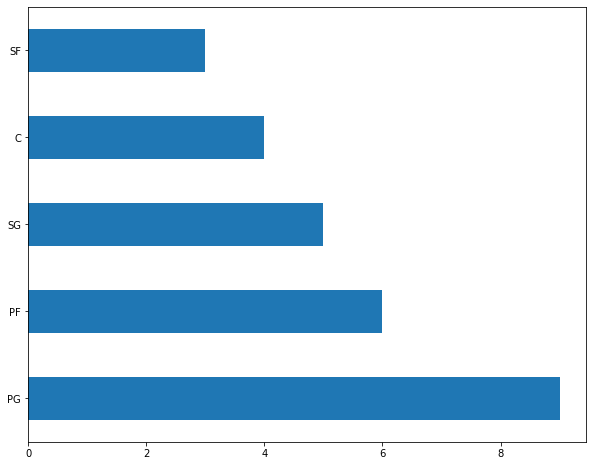

In [ ]:
# Cantidad de jugadores destacados por posición

Jugadores['Pos'].value_counts().plot(kind='barh', figsize=(10,8));

# Estadísticas por conferencia

In [ ]:
# Dataframe Equipos por conferencia
nba_conferencias = pd.DataFrame(
    {
     "Tm": ["ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAL", "LAC", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"],
     "Conf": ["East", "East", "East", "East", "East", "East", "West", "West", "East", "West", "West", "East", "West", "West", "West", "West", "East", "West", "East", "East", "West", "East", "East", "West", "West", "West", "West", "East", "West", "East"]
    })
nba_conferencias


,Tm,Conf
0,ATL,East
1,BOS,East
2,BRK,East
3,CHO,East
4,CHI,East
5,CLE,East
6,DAL,West
7,DEN,West
8,DET,East
9,GSW,West


In [ ]:
# Añadir la columna Conf al df nba_stats
nba_stats_conf = pd.merge(nba_stats, nba_conferencias, on='Tm')
nba_stats_conf.dtypes

Rk           int64
Player      object
Pos         object
Tm          object
3P         float64
3P%        float64
2P         float64
2P%        float64
0-3f%      float64
3-10f%     float64
10-16f%    float64
16f-3P%    float64
Dunks        int64
FT         float64
FT%        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Conf        object
dtype: object

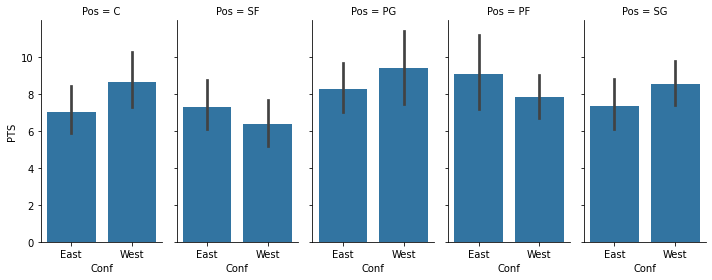

In [ ]:
# Anotaciones por posición. Conferencia Este vs Conferencia Oeste

g = sns.FacetGrid(nba_stats_conf, col="Pos", height=4, aspect=.5)
g.map(sns.barplot, "Conf", "PTS", order=["East", "West"]);

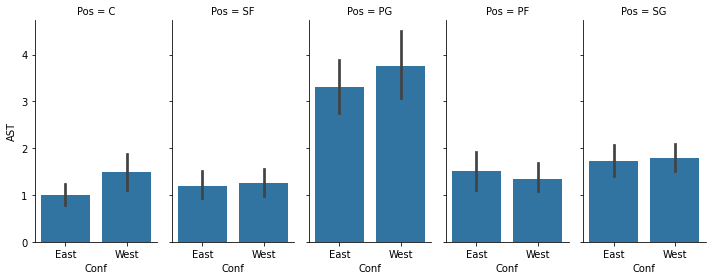

In [ ]:
# Asistencias por posición. Conferencia Este vs Conferencia Oeste

g = sns.FacetGrid(nba_stats_conf, col="Pos", height=4, aspect=.5)
g.map(sns.barplot, "Conf", "AST", order=["East", "West"]);